# Cancer Breast ML

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#de quoi découper le Dataframe

#permet de binarizer une colonne
from sklearn.preprocessing import label_binarize

#import le modèle 

#pour dessiner l'arbre
from sklearn import tree

#donne le score d'accuracy
#permet d'avoir la courbe roc



# Import et nettoyage

In [36]:
raw_data = pd.read_csv('breast-cancer-wisconsin.data', sep=',',header=None)

#on rajoute une entête
entete = ["Index", "F1", "F2", "F3", "F4", "F5", "F6", "F7", "F8", "F9","Y"]
raw_data.columns=entete
#on change l'index
raw_data = raw_data.set_index("Index")
raw_data.head()
#raw_data.info()




,F1,F2,F3,F4,F5,F6,F7,F8,F9,Y
Index,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


In [18]:
raw_data.columns=entete
raw_data

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,Y
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


In [27]:
raw_data["Index"] == 1002945

0      True
1      True
2      True
3      True
4      True
       ... 
694    True
695    True
696    True
697    True
698    True
Name: Index, Length: 699, dtype: bool

In [4]:
#recherche de valeur abérante
print ("la colone 6 a un mauvais type\n",raw_data.info())
#On voit que la colonne 6 a un pb
print ("la colonne a un soucis\n",raw_data["F6"].value_counts())
#on remplace ? par 1 ou rien
raw_data["F6"] = raw_data["F6"].apply (lambda x : (1 if x == '?' else x))
#On force le type int dans toute la colonne
raw_data["F6"] = raw_data["F6"].astype(int)
#On peut voir que la colonne est ok
print ("tout est ok\n",raw_data["F6"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Index   699 non-null    int64 
 1   F1      699 non-null    int64 
 2   F2      699 non-null    int64 
 3   F3      699 non-null    int64 
 4   F4      699 non-null    int64 
 5   F5      699 non-null    int64 
 6   F6      699 non-null    object
 7   F7      699 non-null    int64 
 8   F8      699 non-null    int64 
 9   F9      699 non-null    int64 
 10  Y       699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
la colone 6 a un mauvais type
 None
la colonne a un soucis
 1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: F6, dtype: int64
tout est ok
 1     418
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: F6, dtype: int64


In [5]:
data= raw_data.copy()
#print ("la forme",Data.shape)
#print ("les types de feature\n",Data.dtypes)
print ("des infos\n",data.info())
#Data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Index   699 non-null    int64
 1   F1      699 non-null    int64
 2   F2      699 non-null    int64
 3   F3      699 non-null    int64
 4   F4      699 non-null    int64
 5   F5      699 non-null    int64
 6   F6      699 non-null    int32
 7   F7      699 non-null    int64
 8   F8      699 non-null    int64
 9   F9      699 non-null    int64
 10  Y       699 non-null    int64
dtypes: int32(1), int64(10)
memory usage: 57.5 KB
des infos
 None


In [6]:

#On binarise la sortie : 
data["Y"] = label_binarize (data["Y"],classes = (2,4))

#Data["Sol"] = Data["Y"].apply (lambda x : ('Maligne' if x > 2 else 'Benine'))
data["Y"].value_counts()

0    458
1    241
Name: Y, dtype: int64

## Création des dataset train & test / séparation Feature Classe

In [7]:
from sklearn.model_selection import train_test_split

#On fait un jeu de feature et un jeu solution ET on lui met 2 catégorie (vrai ou faux)
data_sol = data["Y"]
data_feature = data.drop (["Y"],axis=1)

#on subdivise en un train et un test
X_train, X_test, y_train, y_test = train_test_split(data_feature,data_sol,test_size=0.2,random_state=42)

(X_train.shape,y_train.shape),(X_test.shape,y_test.shape)

(((559, 10), (559,)), ((140, 10), (140,)))

# Le modèle

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

raw_model = DecisionTreeClassifier()
raw_model_RFC = RandomForestClassifier()

fitted_model = raw_model.fit(X_train,y_train)
fitted_model_RFC = raw_model_RFC.fit(X_train,y_train)


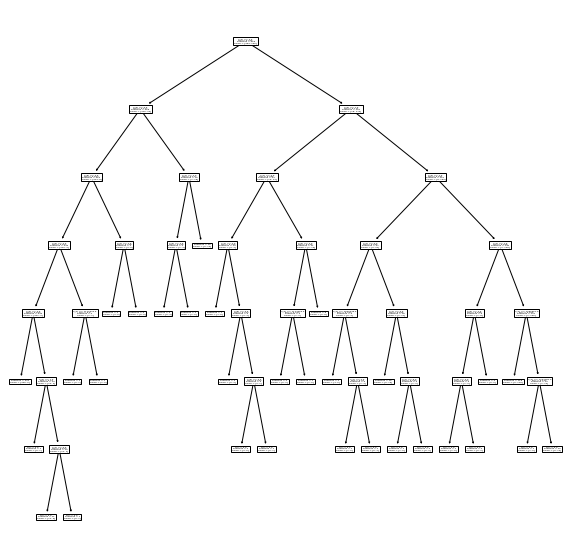

In [13]:
#fct scoring du DTC (mean accuracy) entre train et test
fitted_model.score(X_train,y_train) , fitted_model.score(X_test,y_test)

#Show Tree
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(1, figsize=(10, 10))

tree.plot_tree(fitted_model)
plt.show()

dot_data = tree.export_graphviz(clf, out_file=None, 
...                      feature_names=iris.feature_names,
...                      class_names=iris.target_names,
...                      filled=True, rounded=True,
...                      special_characters=True)
>>> graph = graphviz.Source(dot_data)
>>> graph

In [10]:
Y_pred_train = fitted_model.predict(X_train)
Y_pred_test  = fitted_model.predict(X_test)

y_RFC_test == fitted_model_RFC.predict(X_test)

NameError: name 'y_RFC_test' is not defined

In [ ]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
#On veux la courbe ROC
fpr_train, tpr_train, thr_train = roc_curve(y_train,Y_pred_train)
fpr_test, tpr_test, thr_test = roc_curve(y_test,Y_pred_test)
#On calcul l'air avec la courbe
auc_train2 = auc(fpr_train, tpr_train)
auc_test2 = auc(fpr_test, tpr_test)

#On veut l'air sous la courbe
auc_train = roc_auc_score(y_train, Y_pred_train)
auc_test = roc_auc_score(y_test, Y_pred_test)

print ("le train",auc_train2,auc_train)
print ("le test",auc_test2,auc_test)




In [ ]:
from sklearn.metrics import plot_roc_curve
#On dessine la courbe :
plot_roc_curve(fitted_model,X_test,y_test,name='DTC')

In [ ]:
plot_roc_curve(fitted_model_RFC,X_test,y_test,name='RFC')

# Train & Cross Validation hyperparameter tuning

## Etape 5 :
- Utiliser la 'Use-Validation' pour déterminer les bons paramètres
>
- Utiliser la 'Cross-Validation' pour déterminer les bons paramètres
>
- Quel est l'air sous la courbe ROC de ces nouveaux modèles, quel est l'accuracy, quel est le meilleur modèle
>

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True],
     'max_depth': [2, 3],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [3, 5],
     'min_samples_split': [4, 6],
     'n_estimators': [100, 350]
    }


In [ ]:
forest_grid_search = GridSearchCV(rf, param_grid, cv=5,
                                  scoring="accuracy",
                                  return_train_score=True,
                                  verbose=True,
                                  n_jobs=-1)

forest_grid_search.fit(X_train, y_train)

In [ ]:
GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=2, random_state=0),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [2, 3],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [3, 5],
                         'min_samples_split': [4, 6],
                         'n_estimators': [100, 350]},
             return_train_score=True, scoring='accuracy', verbose=True)

In [ ]:
forest_grid_search.best_params_

In [ ]:
forest_grid_search.best_estimator_